## Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/jennytran/Documents/GitHub/smoc-project/data/SMOCDemoGCA.xlsx - SMOCDemoGCA.csv')

df = df[['person_id','Day','chat_room_id','z.participation',
 'z.social.impact',
 'z.overall.responsivity',
 'z.internal.cohesion',
 'z.newness',
 'z.comm.density',
 'SixCluster', 'Sex']]

df = df.dropna().reset_index(drop=True)

#Groups of only 4
df = df[df.groupby('chat_room_id')['chat_room_id'].transform('size') == 4].reset_index(drop=True)
chat_room_id = list(set(df['chat_room_id']))

In [3]:
len(df['person_id'].unique())

1401

In [4]:
df.shape

(3040, 11)

In [5]:
#Number of Females
a = df[df['Sex'] == 2]
len(a['person_id'].unique())

847

In [6]:
#Number of Males
a = df[df['Sex'] == 1]
len(a['person_id'].unique())

554

## Female Majority, Minority, and Gender Parity

In [7]:
#Find number of females in a group -> df2
sex_lst = []
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
num_females = []
for n in chat_room_id:
  a = df[df['chat_room_id'] == n]
  temp_sex = []
  for i in a['Sex']:
    temp_sex.append(i)
  sex_lst.append(temp_sex)
  z_par.append(sum(a['z.participation']) / len(a['z.participation']))
  z_soc.append(sum(a['z.social.impact']) / len(a['z.social.impact']))
  z_overesp.append(sum(a['z.overall.responsivity']) / len(a['z.overall.responsivity']))
  z_internal.append(sum(a['z.internal.cohesion']) / len(a['z.internal.cohesion']))
  z_new.append(sum(a['z.newness']) / len(a['z.newness']))
  z_dens.append(sum(a['z.comm.density']) / len(a['z.comm.density']))

for n in sex_lst:
  num_females.append(n.count(2))

d = {"chat_room_id": chat_room_id, "Number of Females": num_females ,"Gender": sex_lst, 'avg_participation': z_par, 'avg_social.impact': z_soc,'avg_overall.responsivity': z_overesp,'avg_internal.cohesion': z_internal,'avg_newness': z_new,'avg_comm.density': z_dens}
df2 = pd.DataFrame(d)
df2.drop(df2.loc[df2['Number of Females']==0].index, inplace=True)
df2.drop(df2.loc[df2['Number of Females']==4].index, inplace=True)
df2.reset_index()

,index,chat_room_id,Number of Females,Gender,avg_participation,avg_social.impact,avg_overall.responsivity,avg_internal.cohesion,avg_newness,avg_comm.density
0,0,classChat-1492-14545,3,"[2.0, 2.0, 1.0, 2.0]",1.387779e-17,-0.610033,-0.567898,-0.586692,-0.360291,-0.065411
1,1,classChat-1403-13517,2,"[1.0, 2.0, 1.0, 2.0]",2.062246e-01,-0.595722,-0.700205,-0.516567,-0.191095,-0.086285
2,2,classChat-1492-14680,2,"[2.0, 1.0, 1.0, 2.0]",-6.825400e-03,0.049171,0.044529,-0.114903,-0.191662,-0.273479
3,4,classChat-1403-13483,1,"[2.0, 1.0, 1.0, 1.0]",-5.947848e-02,-0.245104,-0.259417,-0.157528,-0.243406,-0.206534
4,5,classChat-1403-13529,2,"[2.0, 1.0, 2.0, 1.0]",9.815575e-02,0.367238,0.271823,0.286733,-0.186352,-0.350946
...,...,...,...,...,...,...,...,...,...,...
631,753,classChat-1492-14664,2,"[2.0, 1.0, 1.0, 2.0]",0.000000e+00,-0.466138,-0.450506,-0.161511,-0.247341,-0.121704
632,754,classChat-1176-8183,3,"[2.0, 1.0, 2.0, 2.0]",-4.884150e-02,-0.540888,-0.409671,-0.735333,-0.277107,-0.245292
633,755,classChat-1492-14538,2,"[1.0, 2.0, 2.0, 1.0]",-3.047572e-02,-0.726986,-0.690310,-0.475808,-0.136383,0.076589
634,757,classChat-826-4381,1,"[2.0, 1.0, 1.0, 1.0]",-5.489308e-02,0.036397,-0.035014,-0.094095,-0.196415,-0.195779


In [8]:
num = [1,2,3]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
    if n == 1:
        y = df2.loc[df2['Number of Females'] <= n]
        z_par.append(sum(y['avg_participation']) / len(y))
        z_soc.append(sum(y['avg_social.impact']) / len(y))
        z_overesp.append(sum(y['avg_overall.responsivity']) / len(y))
        z_internal.append(sum(y['avg_internal.cohesion']) / len(y))
        z_new.append(sum(y['avg_newness']) / len(y))
        z_dens.append(sum(y['avg_comm.density']) / len(y))
    elif n == 2:
        y = df2.loc[df2['Number of Females'] == n]
        z_par.append(sum(y['avg_participation']) / len(y))
        z_soc.append(sum(y['avg_social.impact']) / len(y))
        z_overesp.append(sum(y['avg_overall.responsivity']) / len(y))
        z_internal.append(sum(y['avg_internal.cohesion']) / len(y))
        z_new.append(sum(y['avg_newness']) / len(y))
        z_dens.append(sum(y['avg_comm.density']) / len(y))
    elif n == 3:
        y = df2.loc[df2['Number of Females'] >= n]
        z_par.append(sum(y['avg_participation']) / len(y))
        z_soc.append(sum(y['avg_social.impact']) / len(y))
        z_overesp.append(sum(y['avg_overall.responsivity']) / len(y))
        z_internal.append(sum(y['avg_internal.cohesion']) / len(y))
        z_new.append(sum(y['avg_newness']) / len(y))
        z_dens.append(sum(y['avg_comm.density']) / len(y))

In [9]:
plotdata = pd.DataFrame({
    "z.participation":z_par,
    "z.social.impact":z_soc,
    "z.overall.responsivity":z_overesp,
    "z.internal.cohesion":z_internal,
    "z.newness":z_new,
    "z.comm.density":z_dens

    }, 
    index=['female minority', 'gender parity', 'female majority']
)

plotdata = plotdata + .20

(array([0, 1, 2]),
 [Text(0, 0, 'female minority'),
  Text(1, 0, 'gender parity'),
  Text(2, 0, 'female majority')])

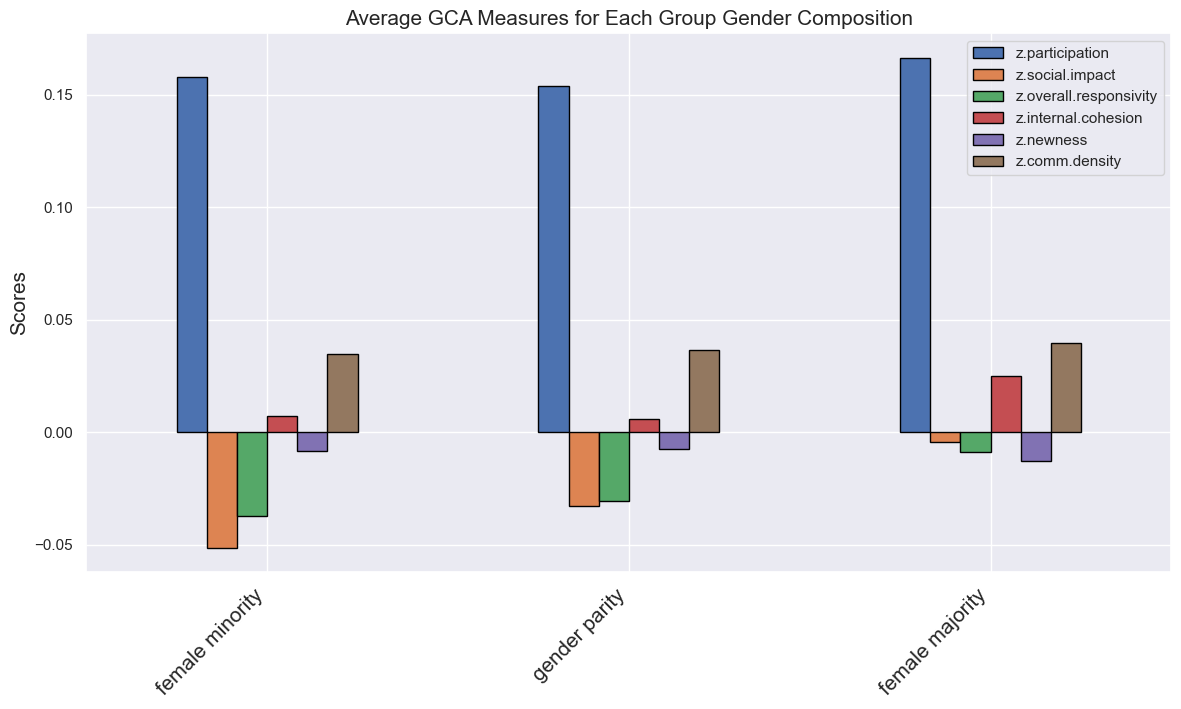

In [10]:
sns.set()
CB_color_cycle = ['#6cc0e5', '#fbc93d', '#fb4f4f',
                  '#F0E442', '#0072B2', '#D55E00',
                  '#999999', '#e41a1c', '#dede00']
plotdata.plot(kind="bar", figsize=(14, 7), edgecolor = 'black')
plt.title("Average GCA Measures for Each Group Gender Composition", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=15)

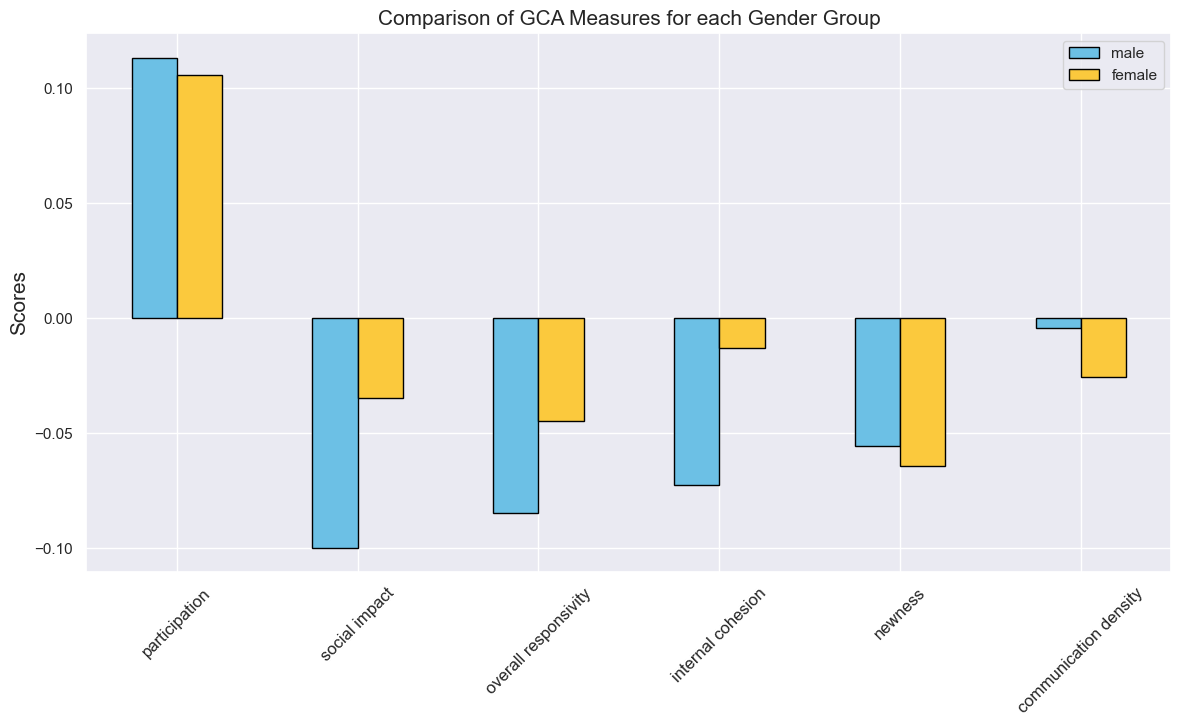

In [23]:
num = [1.0, 2.0]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
    y = df.loc[df['Sex'] == n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))

plotdata = pd.DataFrame({
    "participation":z_par,
    "social impact":z_soc,
    "overall responsivity":z_overesp,
    "internal cohesion":z_internal,
    "newness":z_new,
    "communication density":z_dens

    }, 
    index=['male', 'female']
)

plotdata = plotdata + .15
plotdata = plotdata.transpose()

plotdata.plot(kind="bar", figsize=(14, 7), color = CB_color_cycle, edgecolor = 'black')
plt.title("Comparison of GCA Measures for each Gender Group", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.savefig('/Users/jennytran/Documents/GitHub/smoc-project/outputs/gca_gender.png')

## Mean measure for female students

In [11]:
sex_lst = []
num_females = []
for n in df['chat_room_id']:
  a = df[df['chat_room_id'] == n]
  temp_sex = []
  for i in a['Sex']:
    temp_sex.append(i)
  sex_lst.append(temp_sex)
for n in sex_lst:
  num_females.append(n.count(2))
len(num_females)

3040

In [12]:
df['Number of Females'] = num_females
df_fem = df.loc[df['Sex']==2]
#df_fem.drop(df_fem.loc[df_fem['Number of Females']==0].index, inplace=True)
df_fem = df_fem.drop(df_fem.loc[df_fem['Number of Females']==4].index)
df_fem.reset_index(drop = True)

,person_id,Day,chat_room_id,z.participation,z.social.impact,z.overall.responsivity,z.internal.cohesion,z.newness,z.comm.density,SixCluster,Sex,Number of Females
0,7.575438e+04,4,classChat-1006-6769,-7.410434e-01,-0.770453,0.602033,-0.912303,-0.551624,-0.410138,5,2.0,1
1,7.575438e+04,8,classChat-1403-13615,-7.410434e-01,-0.770453,0.602033,-0.912303,-0.551624,-0.511968,5,2.0,2
2,3.548091e+05,1,classChat-806-4046,-6.310821e-01,0.357350,0.317717,0.686412,-0.551624,-0.511968,6,2.0,3
3,3.548091e+05,9,classChat-1492-14789,-8.424493e-01,-0.770453,-0.718806,-0.702146,-0.551624,-0.511968,4,2.0,3
4,4.401338e+05,5,classChat-1176-8160,8.151477e-01,0.677761,0.357818,0.686412,-0.334546,-0.166306,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1438,9.909364e+07,9,classChat-1492-14615,-5.477277e-01,-0.526620,-0.701131,-0.657566,-0.421271,-0.021296,4,2.0,3
1439,9.914771e+07,9,classChat-1492-14710,8.151477e-01,-0.770453,-0.243971,-0.912303,-0.514112,0.171010,1,2.0,3
1440,9.914771e+07,4,classChat-1006-6726,1.200000e-17,-0.768057,-0.145738,-0.456536,-0.078973,-0.103386,1,2.0,3
1441,9.914771e+07,5,classChat-1176-8312,7.410434e-01,-0.019031,-0.519231,0.339972,0.203208,0.228773,1,2.0,3


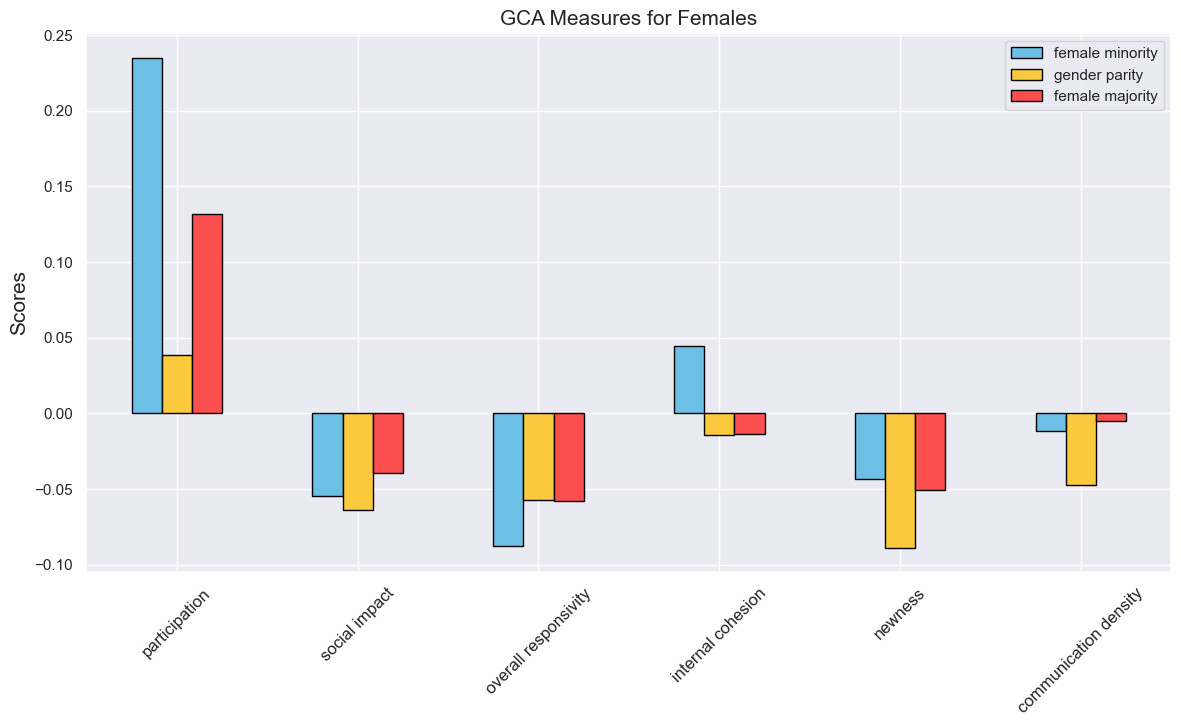

In [13]:
#chat_room_id = list(set(df_fem['chat_room_id']))
num = [1,2,3]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
  if n == 1:
    y = df_fem.loc[df_fem['Number of Females'] <= n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))
  elif n == 2:
    y = df_fem.loc[df_fem['Number of Females'] == n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))
  elif n == 3:
    y = df_fem.loc[df_fem['Number of Females'] >= n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))

plotdata = pd.DataFrame({
    "participation":z_par,
    "social impact":z_soc,
    "overall responsivity":z_overesp,
    "internal cohesion":z_internal,
    "newness":z_new,
    "communication density":z_dens

    }, 
    index=['female minority', 'gender parity', 'female majority']
)

plotdata = plotdata + .15
plotdata = plotdata.transpose()

plotdata.plot(kind="bar", figsize=(14, 7), color = CB_color_cycle, edgecolor = 'black')
plt.title("GCA Measures for Females", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.savefig('/Users/jennytran/Documents/GitHub/smoc-project/outputs/gca_females.png')

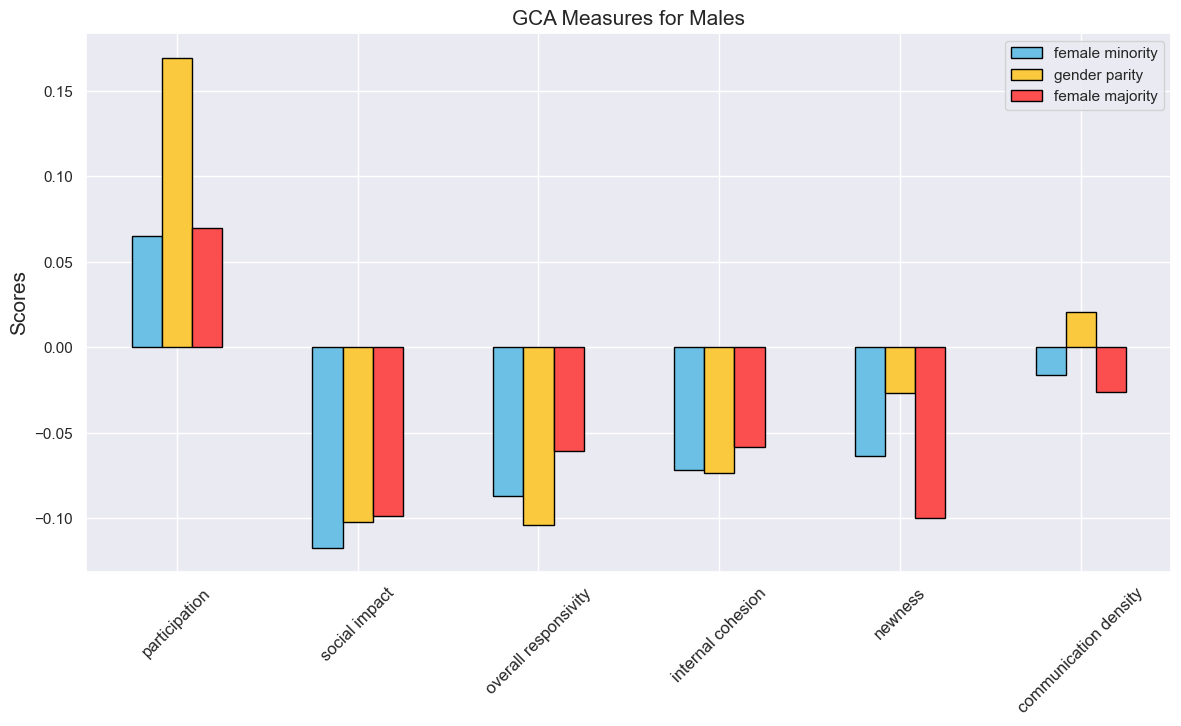

In [14]:
df_male = df.loc[df['Sex']==1]
df_male = df_male.drop(df_male.loc[df_male['Number of Females']==0].index)
df_male.reset_index(drop = True)

num = [1,2,3]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
  if n == 1:
    y = df_male.loc[df_male['Number of Females'] <= n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))
  elif n == 2:
    y = df_male.loc[df_male['Number of Females'] == n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))
  elif n == 3:
    y = df_male.loc[df_male['Number of Females'] >= n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))

plotdata = pd.DataFrame({
    "participation":z_par,
    "social impact":z_soc,
    "overall responsivity":z_overesp,
    "internal cohesion":z_internal,
    "newness":z_new,
    "communication density":z_dens

    }, 
    index=['female minority', 'gender parity', 'female majority']
)

plotdata = plotdata + .15
plotdata = plotdata.transpose()

plotdata.plot(kind="bar", figsize=(14, 7), color = CB_color_cycle, edgecolor = 'black')
plt.title("GCA Measures for Males", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.savefig('/Users/jennytran/Documents/GitHub/smoc-project/outputs/gca_males.png')

## T-Test

In [15]:
import scipy

In [17]:
scipy.stats.ttest_ind(df_fem['z.social.impact'], df_male['z.social.impact'])

Ttest_indResult(statistic=2.799577077350063, pvalue=0.005155596102138064)